# Estadistica descriptiva

In [166]:
import math
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from prettytable import PrettyTable

Se tiene una muestra de 80 piezas hechas de una aleación de aluminio y litio para probar su resistencia a la tension y ver si sirve como material para fabricar un avión, se prueban y se anotan las libras por pulgada (psi) a las que aguantó cada pieza.

In [167]:
x = [
	105,97,245,163,207,134,218,199,160,196,
	221,154,228,131,180,178,157,151,175,201,
	183,153,174,154,190,76,101,142,149,200,
	186,174,199,115,193,167,171,163,87,176,
	121,120,181,160,194,184,165,145,160,150,
	181,168,158,208,133,135,172,171,237,170,
	180,167,176,158,156,229,158,148,150,118,
	143,141,110,133,123,146,169,158,135,149
]

Primero vamos a sacar alguna informacion basica

In [168]:
n = len(x)  # tamaño de muestra
minimo = min(x)  # dato mas chico de la muestra
maximo = max(x)  # dato mas grande de la muestra
rango = maximo - minimo
promedio = sum(x) / n
n, minimo, maximo, rango, promedio

(80, 76, 245, 169, 162.6625)

Para sacar la **mediana ($\tilde{x}$)** hay que ordenar de menor a mayor los datos y encontrar el dato que este justo en medio

In [169]:
# ordenar los datos
x_ordenado = sorted(x)
# ver si n es par o impar
# a n le restamos 1 porque las listas incluyen el 0 como primera posicion
if n % 2 == 0:
	# si es par
	mediana = (x_ordenado[int((n - 1) / 2)] + x_ordenado[int((n - 1) / 2) + 1]) / 2
else:
	# si es impar
	mediana = x_ordenado[int(((n - 1) + 1) / 2)]
mediana

161.5

Tambien puede ser sacada con una funcion que tiene el paquete numpy

In [170]:
mediana = np.median(x)
mediana

161.5

Para sacar la **moda ($\tilde{x}$)**, nomas hay que buscar el dato que mas frecuencia tenga, si hay varios datos con igual frecuencia, ambos pueden ser la moda

In [171]:
moda = x[0]
counter = 0
for i in x:
	curr_frequency = x.count(i)
	if curr_frequency > counter:
		counter = curr_frequency
		moda = i
del i, counter, curr_frequency
moda

158

O bien, con una funcion que tiene el paquete de scipy.stats

In [172]:
moda = st.mode(x)
moda = moda.mode[0]
moda

158

Para sacar la **varianza ($\sigma^{2}$)**
* Primero se saca la resta de cada dato con el promedio y luego se eleva al cuadrado
* Luego se suman entre si los resultados de estas restas
* Luego se divide entre la resta de *n* y 1

OJO, cuando es una muestra se resta *n - 1*, cuando es una poblacion, a *n* no se le resta nada

In [173]:
sum([(i - promedio) ** 2 for i in x]) / (n - 1)

1140.6314873417728

Pero tambien existe esta funcion dentro del paquete de numpy

In [174]:
# como x es una muestra, se agrega el parametro ddof con valor 1 para que haga la resta de (n - 1) al dividir
varianza = np.var(x, ddof = 1)
varianza

1140.631487341772

Para sacar la **desviacion estandar ($\sigma$)** nomas saque la raiz cuadrada de la varianza

In [175]:
# puede sacarse de estas dos maneras
varianza ** 0.5, np.sqrt(varianza)

(33.77323625804569, 33.77323625804569)

O bien, use la formula que incluye numpy

In [176]:
# aqui tambien ocupa el parametro ddof = 1
desv = np.std(x, ddof = 1)
desv

33.77323625804569

##### Cuartiles

Son los puntos de division que se le hacen al conjunto de datos ordenados de menor a mayor en partes iguales

In [177]:
# dividir sobre 4 el tamaño de la muestra
q1_pos = int(n / 4)
# para obtener la posicion del 2do cuartil
q2_pos = q1_pos * 2
q3_pos = q1_pos * 3

q1_pos, q2_pos, q3_pos

(20, 40, 60)

In [178]:
# ordenar los datos
x_ordenado = sorted(x)
# le restamos 1 porque las listas incluyen el 0 como primera posicion
# al otro dato no le restamos por lo mismo
q1 = (x_ordenado[q1_pos - 1] + x_ordenado[q1_pos]) / 2
q2 = (x_ordenado[q2_pos - 1] + x_ordenado[q2_pos]) / 2
q3 = (x_ordenado[q3_pos - 1] + x_ordenado[q3_pos]) / 2

del q1_pos, q2_pos, q3_pos
q1, q2, q3

(144.0, 161.5, 181.0)

numpy tambien tiene una funcion para sacar los cuartiles que quieras

In [179]:
# la funcion regresa un array asi que defina las variables de esta manera
q1, q2, q3 = np.quantile(x, [0.25, 0.5, 0.75])
q1, q2, q3

(144.5, 161.5, 181.0)

##### Percentiles

Son los conjuntos de datos ordenados divididos en 100 partes iguales.

* El percentil del 25% *$P_{25}$ = $Q_{1}$*
* El percentil del 50% *$P_{50}$ = $\tilde{x}$ = $Q_{2}$*
* El percentil del 75% *$P_{75}$ = $Q_{3}$*

In [180]:
# funcion para sacar los percentiles
def percentil(x, k):
	x = sorted(x)
	if k < 0: return min(x)
	if k > 100: return max(x)
	# convertir k en base a 1
	k = k / 100
	# encontrar la posicion i del percentil mediante el calculo de nk
	nk = len(x) * k
	# si nk es float pero con 0 de decimal convertir a int (de 8.0 a 8)
	if nk.is_integer(): nk = int(nk)
	# si nk es entero, i va a ser igual a nk + 0.5
	if isinstance(nk, int): i = nk + 0.5
	# si nk no es entero, entonces i es el siguiente entero mas grande
	else: i = math.ceil(nk)
	# si i es entero, se cuentan las observaciones desde la mas chica hasta hallar el i-esimo valor
	# OJO, a la posicion SE LE RESTA 1 porque las posiciones EMPIEZAN DEL 0
	if isinstance(i, int): pk = x[i - 1]
	# si i no es entero, entonces contiene una fraccion igual a un medio, con lo que el valor de pk es el promedio de las observaciones ordenadas nk y nk + 1
	else: pk = (x[nk - 1] + x[nk]) / 2
	# si es un float con 0 de decimal, convertir a int (de 2.0 a 2)
	if pk.is_integer(): pk = int(pk)
	return pk

In [181]:
def percentile(x, k):
	if not x: return None
	if k <= 0: return min(x)
	if k >= 100: return max(x)
	# ordenar los datos
	x = sorted(x)
	# convertir k en base a 1
	k = k / 100
	# encontrar la posicion i del percentil mediante el calculo de nk
	nk = (len(x) - 1) * k
	f = math.floor(nk)
	c = math.ceil(nk)
	# key function to compute value from each element of x
	key = lambda a: a
	if f == c: return key(x[int(nk)])
	d0 = key(x[int(f)]) * (c - nk)
	d1 = key(x[int(c)]) * (nk - f)
	return d0 + d1

In [182]:
# si queremos encontrar el percentil 10
p10 = percentil(x, 10)
# para encontrar el percentil 90
p90 = percentil(x, 90)
p10, p90

(119, 204)

o bien

In [183]:
p10 = np.percentile(x, 10)
p90 = np.percentile(x, 90)
p10, p90

(119.8, 201.60000000000005)

##### Sesgo (o asimetria)

Si los datos están sesgados, su media, mediana y moda son diferentes.
* Si la *$\hat{x}$ = $\tilde{x}$ = $\overline{x}$* la distribución es simétrica.
* Si la *$\hat{x}$ < $\tilde{x}$ < $\overline{x}$* la distribución esta sesgada a la derecha o tiene sesgo positivo.
* Si la *$\hat{x}$ > $\tilde{x}$ > $\overline{x}$* la distribución esta sesgada a la izquierda o tiene sesgo negativo.

##### Curtosis

Hay 3 tipos de curtosis para las distribuciones de datos:
* Si *Cu > 0* es Leptocúrtica. Hay mucha concentración de datos en la media.
* Si *Cu = 0* es Mesocúrtica. Tiene una distribución normal.
* Si *Cu < 0* es Platicúrtica. Hay muy poca concentración de datos en la media.

In [184]:
# para sacar el sesgo y la curtosis
# sesgo = (q3 + q1 - (2 * q2)) / (q3 - q1)
sesgo = sum([(i - promedio) ** 3 for i in x]) / (n * desv ** 3)
curtosis = (q3 - q1) / (2 * (p90 - p10))
sesgo, curtosis

(-0.024094702110388264, 0.22310513447432748)

In [185]:
sesgo = st.skew(x)
curtosis = st.kurtosis(x)
sesgo, curtosis

(-0.02455364118121435, 0.15144064009107616)

Hay un dato que se llama **error tipico** o **error estandar**.
Este vendria siendo parte del margen de error que se calcula para encontrar el promedio poblacional.
Se halla dividiendo la desviación estandar entre la raíz cuadrada del tamaño de la muestra.

In [186]:
error_tipico = desv / (n ** 0.5)
error_tipico

3.77596260465754

In [187]:
st.sem(x)

3.77596260465754

Acomodamos todo para presentar la estadistica descriptiva de los datos

In [188]:
pd.DataFrame(
	data = {'valor': [n, minimo, maximo, rango, promedio, mediana, moda, varianza, desv, q1, q2, q3, sesgo, curtosis, error_tipico]},
	index = ['n', 'minimo', 'maximo', 'rango', 'promedio', 'mediana', 'moda', 'varianza', 'desv', 'Q1', 'Q2', 'Q3', 'sesgo', 'curtosis',
			 'error tipico']
)

,valor
n,80.000000
minimo,76.000000
maximo,245.000000
rango,169.000000
promedio,162.662500
mediana,161.500000
moda,158.000000
varianza,1140.631487
desv,33.773236
Q1,144.500000


O bien, puede usar esta funcion

In [189]:
pd.DataFrame(x).describe()

,0
count,80.000000
mean,162.662500
std,33.773236
min,76.000000
25%,144.500000
50%,161.500000
75%,181.000000
max,245.000000


#### Histograma

Suelen ser para presentar frecuencias

El eje horizontal es donde va la escala de la variable que se anda observando
El eje vertical es para representar la escala de las frecuencias

In [190]:
# la regla de sturges nos dice la mejor cantidad de clases a las que agrupamos los datos
sturges = round(1 + 3.322 * np.log10(n))
sturges

7

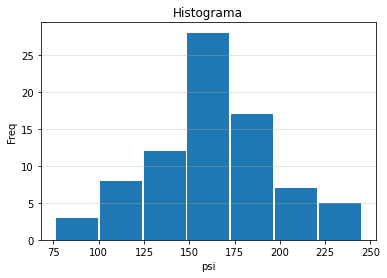

In [191]:
plt.hist(x, bins = sturges, rwidth = 0.96)
plt.grid(axis = 'y', alpha = 0.4)
plt.title('Histograma')
plt.xlabel('psi')
plt.ylabel('Freq')
plt.show()
del sturges

#### Diagrama de tallo y hoja

Cada numero del conjunto de datos debe ser de almenos 2 digitos
* El **tallo** esta formado por uno o mas de los digitos principales
* La **hoja** contiene el resto de los digitos

In [192]:
def diagrama_tallo_hoja(x: list):
	table = PrettyTable()
	table.field_names = ['Tallo', 'Hoja', 'Freq']
	table.align['Tallo'] = 'r'
	table.align['Hoja'] = 'l'
	table.align['Freq'] = 'c'
	for tallo, g in groupby(sorted(x), key = lambda a: int(a) // 10):
		lst = map(str, [int(y) % 10 for y in list(g)])
		hoja = ' '.join(lst)
		freq = sum(c.isdigit() for c in hoja)
		table.add_row([tallo, hoja, freq])
	print(table.get_string())

diagrama_tallo_hoja(x)

+-------+-------------------------+------+
| Tallo | Hoja                    | Freq |
+-------+-------------------------+------+
|     7 | 6                       |  1   |
|     8 | 7                       |  1   |
|     9 | 7                       |  1   |
|    10 | 1 5                     |  2   |
|    11 | 0 5 8                   |  3   |
|    12 | 0 1 3                   |  3   |
|    13 | 1 3 3 4 5 5             |  6   |
|    14 | 1 2 3 5 6 8 9 9         |  8   |
|    15 | 0 0 1 3 4 4 6 7 8 8 8 8 |  12  |
|    16 | 0 0 0 3 3 5 7 7 8 9     |  10  |
|    17 | 0 1 1 2 4 4 5 6 6 8     |  10  |
|    18 | 0 0 1 1 3 4 6           |  7   |
|    19 | 0 3 4 6 9 9             |  6   |
|    20 | 0 1 7 8                 |  4   |
|    21 | 8                       |  1   |
|    22 | 1 8 9                   |  3   |
|    23 | 7                       |  1   |
|    24 | 5                       |  1   |
+-------+-------------------------+------+


#### Diagrama de caja

Estos diagramas contienen:
* los 3 cuartiles
* el valor minimo y maximo de los datos
* valores atipicos

El rectangulo abarca el *rango intercuartilico*, o sea
* *Q1* la linea de abajo
* *Q2 = P50 = mediana* la linea de enmedio
* *Q3* la linea de arriba

Las patas de arriba y abajo son la longitud desde los cuartiles a sus valores maximo y minimo, los valores atipicos se muestran con un punto

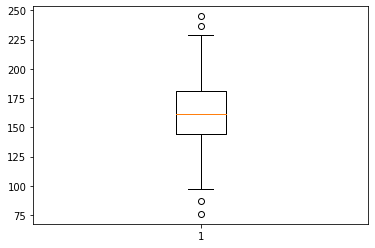

In [193]:
plt.boxplot(x)
plt.show()

#### Graficas de series de tiempo

Su eje horizontal es el tiempo, ya sea medido en años, segundos, etc.

Su eje vertical es la variable que se anda observando

Suponiendo que el orden de las resistencias está a como se tuvieron con el paso del tiempo

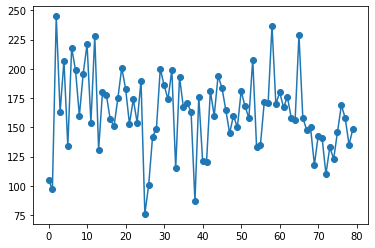

In [194]:
plt.plot(range(n), x, 'o-')
plt.show()

### Graficas de probabilidad

Es un metodo grafico para ver si los datos de una muestra se ajustan a una distribucion propuesta con base en un examen visual sugestivo de los datos.

Para hacer una de estas graficas:
* se ordenan los datos de menor a mayor
* se grafican contra su frecuencia acumulada observada *(j - 0.5) / n* sobre el papel de probabilidad apropiado.

Si la distribucion propuesta describe de manera adecuada los datos, los puntos de la grafica se ubicaran de manera aproximada a lo largo de una linea recta; si los puntos se desvian significativamente de una linea recta, entonces el modelo propuesto no es el apropiado.

Suponiendo que las resistencias se ajustan a una distribucion normal. Para hacer una grafica y probar esa hipotesis, primero ordenamos las observaciones en orden ascendente y calculamos sus frecuencias acumuladas con *(j − 0.5) / n*

In [195]:
d = {'j': [], 'xj': [], 'fa': [], '100fa': [], 'zj': []}
for j, xj in enumerate(sorted(x)):
	fa = ((j + 1) - 0.5) / n
	cien_fa = 100 * fa
	zj = st.norm.ppf(fa)
	d['j'].append(j + 1)
	d['xj'].append(xj)
	d['fa'].append(fa)
	d['100fa'].append(cien_fa)
	d['zj'].append(zj)
tabla = pd.DataFrame(d).set_index('j')
del d, j, xj, fa, cien_fa, zj
tabla

,xj,fa,100fa,zj
j,,,,
1,76,0.00625,0.625,-2.497705
2,87,0.01875,1.875,-2.080278
3,97,0.03125,3.125,-1.862732
4,101,0.04375,4.375,-1.708735
5,105,0.05625,5.625,-1.587056
...,...,...,...,...
76,221,0.94375,94.375,1.587056
77,228,0.95625,95.625,1.708735
78,229,0.96875,96.875,1.862732


Despues de graficar, hay que poner una linea recta (puede ponerse asi de manera subjetiva) que pase a traves de los puntos de la grafica. Al poner la linea hay que hacerle mas caso a los puntos del centro de la grafica que a los de las esquinas. Una buena regla es dibujar la linea entre los puntos que correspondan a los percentiles 25 y 75.

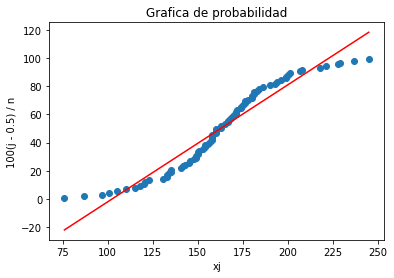

In [196]:
ejex = tabla['xj']
ejey = tabla['100fa']
plt.scatter(ejex, ejey)

z = np.polyfit(ejex, ejey, 1)
p = np.poly1d(z)
plt.plot(ejex, p(ejex), 'r-')

plt.title('Grafica de probabilidad')
plt.xlabel('xj')
plt.ylabel('100(j - 0.5) / n')
plt.show()

Tambien puede hacerse una grafica de probabilidad normal poniendo en el eje vertical los valores estandarizados (*zj*)

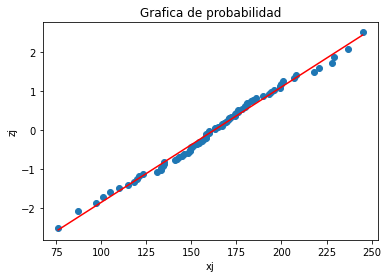

In [197]:
ejex = tabla['xj']
ejey = tabla['zj']
plt.scatter(ejex, ejey)

z = np.polyfit(ejex, ejey, 1)
p = np.poly1d(z)
plt.plot(ejex, p(ejex), 'r-')

plt.title('Grafica de probabilidad')
plt.xlabel('xj')
plt.ylabel('zj')
plt.show()

del tabla, ejex, ejey, z ,p